In [1]:
import numpy as np
import pandas as pd

### SERIES

In [2]:
# pd.Series(data, index=index, name='name')

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [19]:
# We can generate the Series either from np.array,list, dictionary or simply a scalar value @-@

# np.array 
# For ex, I want to generate a series with value from 0-9 with index from 3-13 @-@
pd.Series(np.arange(10),index=range(3,13))[5:]

8     5
9     6
10    7
11    8
12    9
dtype: int32

In [11]:
# More ex: @-@    # Remember that the length of index must be equal to length of data input *-*
pd.Series(np.linspace(0,10,5),index=['a','e',12,15,'@'])

a      0.0
e      2.5
12     5.0
15     7.5
@     10.0
dtype: float64

In [13]:
# List
# Without the index parameters, by default, it will give integer index from 0 *-*
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [14]:
# Dictionary
D={'a':122,'b':123, 'c':321}
pd.Series(D)

a    122
b    123
c    321
dtype: int64

In [15]:
# So what about an scalar value ??? Curious @-@
pd.Series(12,index=np.linspace(2,10,5))

2.0     12
4.0     12
6.0     12
8.0     12
10.0    12
dtype: int64

In [17]:
# Type of the series is obviously... pd.series @-@
type(pd.Series([1,2,3]))

pandas.core.series.Series

In [18]:
# .dtype  : this function return type of data
# So, how to check the values inside the Series
pd.Series([1,2,3]).dtype   # So value inside is obviously integer *-*

dtype('int64')

Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

Series also have some similarity with a list 

In [32]:
# For an example series @-@
S= pd.Series(np.arange(10))
S[:3]

0    0
1    1
2    2
dtype: int32

In [53]:
S[[4,2,8]]

4    4
2    2
8    8
dtype: int32

In [61]:
S[list(range(len(S)))[::-1]][:3]

9    9
8    8
7    7
dtype: int32

In [33]:
S[S>5]

6    6
7    7
8    8
9    9
dtype: int32

In [37]:
S[(S>5)& (S<9)]

6    6
7    7
8    8
dtype: int32

In [45]:
print(np.array(S[S>S.mean()]))
print(np.array(S[S>S.median()]))

[5 6 7 8 9]
[5 6 7 8 9]


In [43]:
np.array(S>5)

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [49]:
print(np.array(np.log(S[1:])))
print(np.array(np.exp(S)))

[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [52]:
S2=2*S
S2[:5]

0    0
1    2
2    4
3    6
4    8
dtype: int32

In [39]:
[(2*x+5) for x in S]   # List comprehension *-*

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

In [81]:
# .array
# .to_numpy
# We can also convert a list into an array 
S.array   # This function turn to Pandas array
# Or
S.to_numpy
# Or
np.array(S)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
# Can we add 1 new value for our Series @-@
S[10]=5
S[7:]

7     7
8     8
9     9
10    5
dtype: int64

In [90]:
S[::-1][:3]

10    5
9     9
8     8
dtype: int64

In [86]:
S[0:]+ S[::-1]  # Remember that the Series add by index

0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    10
dtype: int64

In [88]:
A= np.array(S)
A[0:]+A[::-1]

array([ 5, 10, 10, 10, 10, 10, 10, 10, 10, 10,  5], dtype=int64)

### BASICS OF DATAFRAME

In [17]:
df = pd.read_csv('C:/Users/Win 10/Documents/RISKY PORTFOLIO/excel_ctg.csv')

In [4]:
# We can preview the data by looking at the head and tail of it @-@
df.head(3)

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,CTG,20210219,37.0,37.50,36.10,37.0,12154600
1,CTG,20210218,36.8,37.05,36.30,36.8,10032300
2,CTG,20210217,36.4,36.80,35.85,36.8,9896400


In [18]:
df.tail(3)

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
2891,CTG,20090720,13.9989,13.9989,13.9989,13.9989,156560
2892,CTG,20090717,14.9269,15.0816,14.7336,14.7336,1002480
2893,CTG,20090716,15.4683,17.4019,15.4683,15.5070,2401900


In [19]:
# .info() : This function show inportant info about the dataset @-@
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <Ticker>      2894 non-null   object 
 1   <DTYYYYMMDD>  2894 non-null   int64  
 2   <Open>        2894 non-null   float64
 3   <High>        2894 non-null   float64
 4   <Low>         2894 non-null   float64
 5   <Close>       2894 non-null   float64
 6   <Volume>      2894 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 158.4+ KB


In [20]:
# .copy(): This func 'copy' a new df which is the same as the original @-@
df2= df.copy()
df2.head(2)

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,CTG,20210219,37.0,37.50,36.1,37.0,12154600
1,CTG,20210218,36.8,37.05,36.3,36.8,10032300


In [9]:
# .columns : This function returns the column names of the dataset
df.columns

Index(['<Ticker>', '<DTYYYYMMDD>', '<Open>', '<High>', '<Low>', '<Close>',
       '<Volume>'],
      dtype='object')

In [4]:
# We can also set the names of the columns *-*
df.columns = ['<Ticker>', '<Date>', '<Open>', '<High>', '<Low>', '<Close>',
       '<Volume>']

In [11]:
df.head(3)  # amazing !!

,<Ticker>,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>
0,CTG,20210219,37.0,37.50,36.10,37.0,12154600
1,CTG,20210218,36.8,37.05,36.30,36.8,10032300
2,CTG,20210217,36.4,36.80,35.85,36.8,9896400


In [46]:
# How to change the format of date in our dataframe @-@
# pd.to_datetime(X,format='%Y%m%d')
df['<Date>']=pd.to_datetime(df['<Date>'],format='%Y%m%d')
df.head(3)

,<Date>,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
0,2021-02-19,CTG,37.0,37.50,36.10,37.0,12154600
1,2021-02-18,CTG,36.8,37.05,36.30,36.8,10032300
2,2021-02-17,CTG,36.4,36.80,35.85,36.8,9896400


In [56]:
# What if we want to add a new column to our df @-@
df['High_low']= High_Low
df.head(3)

,<Date>,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>,High_low
0,2021-02-19,CTG,37.0,37.50,36.10,37.0,12154600,1.40
1,2021-02-18,CTG,36.8,37.05,36.30,36.8,10032300,0.75
2,2021-02-17,CTG,36.4,36.80,35.85,36.8,9896400,0.95


In [32]:
# Now, after finishing all things, We might want to save the df to new csv file @-@
# .to_csv(): This function export a new csv file to the same folder of this Jupiter note
# For ex, I want to save only the open and closed price
df[['<Open>','<Close>']].to_csv('new_df.csv')

### SELECTING ROWS AND COLUMNS

In [1]:
# []
# .iloc[]
# .loc[]

In [14]:
# We can index the columns of data by calling out the column name or list of column names @-@
df['<Open>'].head(3)

0    37.0
1    36.8
2    36.4
Name: <Open>, dtype: float64

In [17]:
# remember that 1 column is 1 dimensional 'Series', while >=2 dimension is called 'Dataframe'

In [16]:
df[['<Open>','<Close>']].head(3)

,<Open>,<Close>
0,37.0,37.0
1,36.8,36.8
2,36.4,36.8


NOTE: Remember that, different from NUMPY, PANDAS use the [] to indicate the 'columns' instead of row

In [5]:
# So what about the row @-@
# For ex, I want to select from 5th row to 9th row *-*
df.iloc[5:10]  # Remember that iloc[] not count the last index 10 @-@

,<Ticker>,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>
5,CTG,20210205,34.95,35.80,34.75,35.8,8496700
6,CTG,20210204,34.80,35.05,34.25,34.7,9413200
7,CTG,20210203,34.50,35.25,34.00,34.9,10075600
8,CTG,20210202,31.80,34.00,31.70,33.9,7767300
9,CTG,20210201,31.80,32.60,31.50,32.0,12315100


In [6]:
# We can also use loc[] instead of iloc[]
df.loc[5:10]   # Different from iloc[], loc[] function count the last index @-@, why???

,<Ticker>,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>
5,CTG,20210205,34.95,35.80,34.75,35.8,8496700
6,CTG,20210204,34.80,35.05,34.25,34.7,9413200
7,CTG,20210203,34.50,35.25,34.00,34.9,10075600
8,CTG,20210202,31.80,34.00,31.70,33.9,7767300
9,CTG,20210201,31.80,32.60,31.50,32.0,12315100
10,CTG,20210129,28.80,32.40,28.80,30.5,14819400


NOTE: 
    
    iloc[] used to extract the row based on integers only
    
    loc[] based on the index of dataframe, not on the order of the row 

In [38]:
# To demonstrate the difference, lets set the index to our df @-@
# df.set_index('column') : This function is used to set the index of our df

df.set_index('<Date>',inplace=True)
df.head(3)

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<Date>,,,,,,
20210219,CTG,37.0,37.50,36.10,37.0,12154600
20210218,CTG,36.8,37.05,36.30,36.8,10032300
20210217,CTG,36.4,36.80,35.85,36.8,9896400


In [39]:
# We can also remove the index of df, @-@
# .reset_index()
df.reset_index(inplace=True)

In [11]:
# There is alternative way to set index at initial steps when we read the df @-@
# Remember that there is a parameter index_col in pd.read_csv() @-@
df2=pd.read_csv('C:/Users/Win 10/Documents/RISKY PORTFOLIO/excel_ctg.csv', index_col='<DTYYYYMMDD>')
df2.head(2)

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<DTYYYYMMDD>,,,,,,
20210219,CTG,37.0,37.50,36.1,37.0,12154600
20210218,CTG,36.8,37.05,36.3,36.8,10032300


In [13]:
# Now, lets check iloc and loc @-@
df.iloc[5:10]

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<Date>,,,,,,
20210205,CTG,34.95,35.80,34.75,35.8,8496700
20210204,CTG,34.80,35.05,34.25,34.7,9413200
20210203,CTG,34.50,35.25,34.00,34.9,10075600
20210202,CTG,31.80,34.00,31.70,33.9,7767300
20210201,CTG,31.80,32.60,31.50,32.0,12315100


In [14]:
df.loc[5:10]  # Since in our Date index, there is no value from 5 to 10 @-@

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<Date>,,,,,,


In [22]:
df.loc[20210201]

<Ticker>         CTG
<Open>          31.8
<High>          32.6
<Low>           31.5
<Close>           32
<Volume>    12315100
Name: 20210201, dtype: object

In [21]:
df.loc[[20210205,20210204,20210203]]

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<Date>,,,,,,
20210205,CTG,34.95,35.80,34.75,35.8,8496700
20210204,CTG,34.80,35.05,34.25,34.7,9413200
20210203,CTG,34.50,35.25,34.00,34.9,10075600


In [27]:
# Uhm, the question is, how can I select multiple rows based on some condition of attributes @-@
# For ex, I want to find all the row with closed price >37
df[df['<Close>']>37]  # AMAZING!!

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<Date>,,,,,,
20210122,CTG,36.9500,38.3000,36.7000,37.6000,11333200
20210118,CTG,39.6000,39.8500,38.6000,38.6000,7197000
20210115,CTG,39.5000,40.1000,39.3000,39.5000,11321800
20210114,CTG,39.0000,39.3500,38.5000,39.1500,8275700
20210113,CTG,38.6500,39.4500,38.5000,38.6500,9063900
20210112,CTG,38.7000,38.9000,38.1000,38.5000,9154200
20210111,CTG,38.9000,39.6000,38.6000,38.7000,10911700
20210108,CTG,39.5000,39.5000,38.5000,38.7000,8380100
20210107,CTG,38.5000,39.6500,38.4000,38.8500,10679600


In [29]:
# What about multiple conditions of the attributes @-@
df[(df['<High>']<38) & (df['<Low>']>36)]   # AMAZING!!

,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
<Date>,,,,,,
20210219,CTG,37.0000,37.5000,36.1000,37.0000,12154600
20210218,CTG,36.8000,37.0500,36.3000,36.8000,10032300
20210125,CTG,37.3000,37.5500,36.5000,36.8000,6580500
20180410,CTG,37.4643,37.7107,36.5277,36.7741,6795480


NOTE: Since we are extracting rows based on 'conditions', hence the object inside the [] is Boolean values (T/F)

NOTE: 
    
    Remember that is pandas, each row and each column of dataframe is recorded as type 'SERIES'

In [24]:
type(df['<Open>'])

pandas.core.series.Series

In [25]:
type(df.iloc[3])

pandas.core.series.Series

In [30]:
# How can we convert dataframe into numpy array ???
# .value()
df.head().values

array([['CTG', 37.0, 37.5, 36.1, 37.0, 12154600],
       ['CTG', 36.8, 37.05, 36.3, 36.8, 10032300],
       ['CTG', 36.4, 36.8, 35.85, 36.8, 9896400],
       ['CTG', 34.45, 35.45, 34.0, 35.4, 8069900],
       ['CTG', 34.05, 36.1, 33.9, 34.05, 12845300]], dtype=object)

### APPLY FUNCTION

NOTE:
    
    Since the for loop in Python is considerably slow, we will try to avoid it as much as possible @-@
    
    The apply() function is very useful in case we want to apply a specific function to each row of the df

In [50]:
# First, lets generate a function @-@
def high_low(row):
    delta= row['<High>']-row['<Low>']
    return delta

In [52]:
df.head()

,<Date>,<Ticker>,<Open>,<High>,<Low>,<Close>,<Volume>
0,2021-02-19,CTG,37.00,37.50,36.10,37.00,12154600
1,2021-02-18,CTG,36.80,37.05,36.30,36.80,10032300
2,2021-02-17,CTG,36.40,36.80,35.85,36.80,9896400
3,2021-02-09,CTG,34.45,35.45,34.00,35.40,8069900
4,2021-02-08,CTG,34.05,36.10,33.90,34.05,12845300


In [53]:
df.apply(high_low, axis=1).head()

0    1.40
1    0.75
2    0.95
3    1.45
4    2.20
dtype: float64

In [54]:
type(df.apply(high_low, axis=1))

pandas.core.series.Series

In [55]:
High_Low= df.apply(high_low, axis=1)

### PLOTTING

#### LINE CHART

In [59]:
# .plot()

<AxesSubplot:>

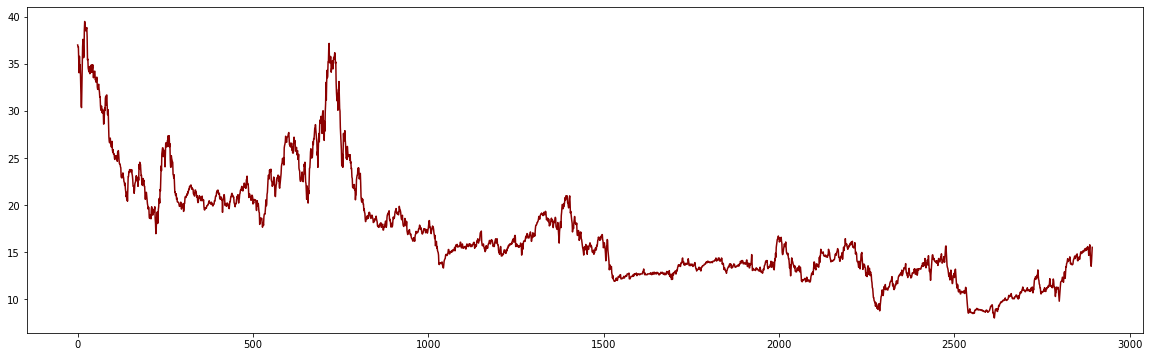

In [62]:
df['<Close>'].plot(c='darkred',figsize=(20,6))

In [73]:
# What about drawing 2 lines simultaneously ??
# 1st, lets import new dataset @-@

df2=pd.read_csv('C:/Users/Win 10/Documents/RISKY PORTFOLIO/excel_pnj.csv')
df['<Close_2>']= df2['<Close>']

<AxesSubplot:>

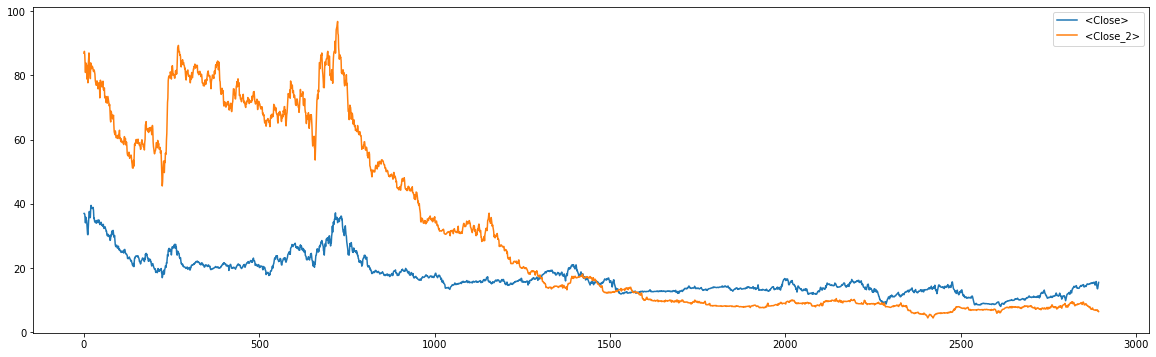

In [74]:
df[['<Close>','<Close_2>']].plot(figsize=(20,6))

#### BOX PLOT

In [82]:
# .plot.box()

In [65]:
# First, lets import different dataset @-@
df3= pd.read_csv('C:/Users/Win 10/Desktop/MACHINE LEARNING/3. CLASSIFICATION/PROJECTS/1.BREAST CANCER WISCONSIN/breast_cancer.csv')

In [66]:
df3.head(3)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [78]:
df3.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

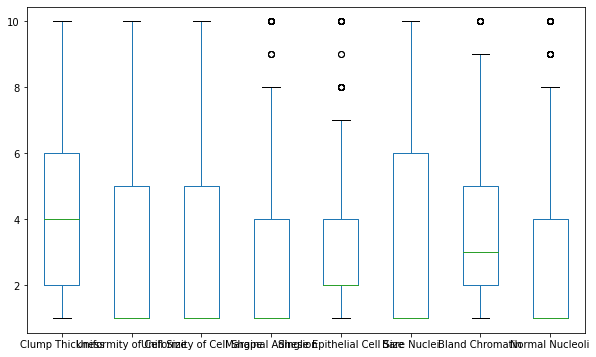

In [81]:
df3[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli']].plot.box(figsize=(10,6));

#### SCATTER MATRIX

In [83]:
from pandas.plotting import scatter_matrix

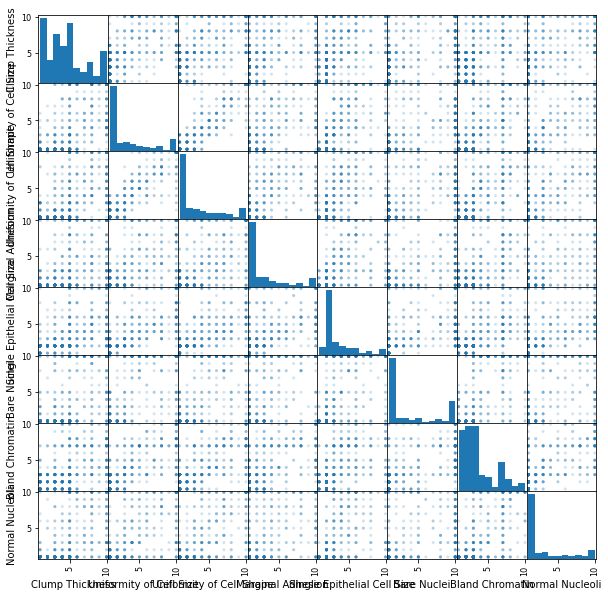

In [85]:
scatter_matrix(df3[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli']],alpha=0.2, figsize=(10,10));

#### PANDAS EXERCISE

GENERATE THE DONUT DATASET

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
x1=np.random.uniform(-1,1,300)
y1= np.sqrt(1-x1**2)+np.random.randn(300)/3

In [157]:
x2=np.random.uniform(-2.5,2.5,400)
y2= np.sqrt((2.5**2)-x2**2)+np.random.randn(400)/3

In [158]:
x1=np.concatenate((x1,x1))
x2=np.concatenate((x2,x2))

In [159]:
y1= np.concatenate((y1,-y1))
y2= np.concatenate((y2,-y2))

In [160]:
x=np.concatenate((x1,x2))
x.shape

(1400,)

In [161]:
y=np.concatenate((y1,y2))
y.shape

(1400,)

In [162]:
label=np.zeros(1400)
label[600:]=np.ones(800)

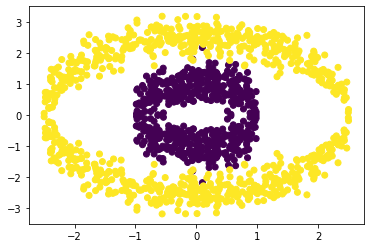

In [163]:
plt.scatter(x,y,c=label)

In [164]:
A=np.concatenate((x,y)).reshape(2,1400).T

In [165]:
A

array([[-0.20867106,  0.62009085],
       [ 0.17053753,  0.83616194],
       [-0.45525632,  0.57577042],
       ...,
       [-1.66417588, -1.5813489 ],
       [-0.40244989, -2.35098143],
       [ 2.04432273, -1.42445731]])

In [130]:
data= pd.DataFrame(A,columns=['X','Y'])
data.head()

,X,Y
0,0.892798,0.450458
1,-0.671900,0.740642
2,-0.157329,0.987546
3,0.160341,0.987062
4,0.870041,0.492980


In [167]:
data['X2'] = data['X']**2
data['Y2'] = data['Y']**2
data['XY'] = data['X']*data['Y']

In [168]:
data['y'] = pd.Series(label)

In [169]:
data.head()

,X,Y,X2,Y2,XY,y
0,0.892798,0.450458,0.797088,0.202912,0.402168,0.0
1,-0.671900,0.740642,0.451449,0.548551,-0.497637,0.0
2,-0.157329,0.987546,0.024752,0.975248,-0.155370,0.0
3,0.160341,0.987062,0.025709,0.974291,0.158266,0.0
4,0.870041,0.492980,0.756971,0.243029,0.428913,0.0


In [170]:
data.to_csv('donut_data.csv')